# knn : k plus proche voisin

In [12]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import freeman
import knn

**On load le dataset MNIST qui comporte 70000 images au format 28*28 pixels.
On divise le dataset avec 85 % des images pour les données d'entrainements et 15 pourcent des images pour les données de test**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# 1) représentation matrice de pixel 0 et 1 pour les images et distance euclidienne

**On convertit les images en matrices de pixels de valeurs 0 et 1**

In [3]:
x_train_binary = freeman.convert_binary(X_train)
x_test_binary = freeman.convert_binary(X_test)

In [4]:
print(x_train_binary.shape)
print(x_test_binary.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
print(x_train_binary[0])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 

**on applatit chaque matrice de pixels sur une ligne ainsi chaque ligne de x_train_binary correspond à une image du dataset (28*28 = 784 pixels), les colonnes corresponent aux pixels et donc aux features dans le cas de l'algorithme naive bayes**

In [6]:
## Flatten binary pixel matrix 
x_train_binary = x_train_binary.reshape(60000, 784)
x_test_binary = x_test_binary.reshape(10000, 784)
print(x_train_binary.shape)
print(x_test_binary.shape)

(60000, 784)
(10000, 784)


**Dans un premier temps nous allons essayer de trouver le K optimum donc nous allons prendre un sous ensemble de l'ensemble de test pour trouver ce K car nous allons tester notre accuracy sur ce sous ensemble pour chaque K. Prendre les 10000 images de l'ensemble de tests pour trouver le K optimum rendaient les calculs trop longs**

In [7]:
x_test_binary_small = x_test_binary[0:30, :]
y_test_binary_small = y_test[0:30]

In [8]:
%%capture
accuracies = []
for k in range(2, 9):
    k_nn = knn.Knn(k)
    preds, accuracy = k_nn.predict_euclidian_dist(x_train_binary, y_train, x_test_binary_small, y_test_binary_small)
    accuracies.append(accuracy)

In [9]:
print(accuracies)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


**Tous les k de 1 à 9 donnent une accuracy de 1, c'est à dire que la prédiction est bonne pour chaque image**

In [ ]:
x_test_binary_small = x_test_binary[0:1000, :]
y_test_binary_small = y_test[0:1000]

In [14]:
%%capture
k_nn = knn.Knn(1)
predictions, accuracy = k_nn.predict_euclidian_dist(x_train_binary, y_train, x_test_binary_small, y_test_binary_small)

**On affiche 10 prédictions sur les images de test**

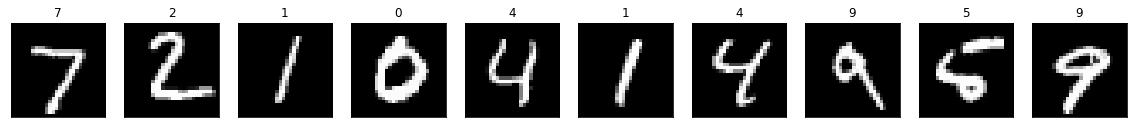

In [15]:
# On affiche 10 prédictions sur les images de test
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()